Add CO_NLTE_excitation folder to path, and import the function elrovibpopcalc_CO which will carry out the stat equilibrium calculation

In [1]:
import numpy as np
import matplotlib.pyplot as pl
#import sys
#sys.path.insert(0, './CO_excitation')
import elrovibpopcalc_CO
import importlib
importlib.reload(elrovibpopcalc_CO)

import matplotlib
matplotlib.rcParams['font.family'] = 'Times New Roman'
font={'size':25}	
matplotlib.rc('font', **font)
matplotlib.rc('axes', linewidth=2)
matplotlib.rc('xtick.major', width=2, size=8)
matplotlib.rc('xtick.minor', width=2, size=4)
matplotlib.rc('ytick.major', width=2, size=8)
matplotlib.rc('ytick.minor', width=2, size=4)
matplotlib.rc('xtick', labelsize=22)
matplotlib.rc('ytick', labelsize=22)
matplotlib.rcParams.update({'figure.autolayout': True})

Access line list/transitions LAMDA file, check that it exists

In [2]:
datafile='./COvibrot_Lambda_nelec2_nvib9_nrot30.dat_corrected.dat'
fname=datafile
#fname='COvibrot_Lambda_nelec2_nvib9_nrot30.dat'
#fname='COrotonly.dat'
try:
	rfile = open(fname, 'r')
except:
	print('Error!' )
	print('Excitation file was not found!')
	sys.exit() 
allfilelines=rfile.readlines() 	
rfile.close()
rfile = open(fname, 'r')

Read energy levels with degeneracies and quantum numbers from the LAMDA file, same way as in the statistical equilibrium elrovibpopcalc_CO code.

In [3]:
dum=rfile.readline()
species=rfile.readline().split()[0]
dum=rfile.readline()
mwt=float(rfile.readline().split()[0])
dum=rfile.readline()
n_levels=int(rfile.readline().split()[0])
dum=rfile.readline()

levid=np.zeros(n_levels, dtype=int)
energycmmin1=np.zeros(n_levels, dtype=float)
wt=np.zeros(n_levels, dtype=float)
qnel=np.zeros(n_levels, dtype=int)
qnvib=np.zeros(n_levels, dtype=int)
qnrot=np.zeros(n_levels, dtype=int)

for i in np.arange(n_levels):
	levid[i], energycmmin1[i], wt[i], qnel[i], qnvib[i], qnrot[i] = rfile.readline().split()
	#levid[i], energycmmin1[i], wt[i], qnrot[i] = rfile.readline().split()    #If using rotational transitions only


Read radiative transition data from LAMDA file, same way as in the statistical equilibrium elrovibpopcalc_CO code.

In [4]:
dum=rfile.readline()
ntr=int(rfile.readline().split()[0])	
dum=rfile.readline()

trid=np.zeros(ntr, dtype=int)
levup=np.zeros(ntr, dtype=int)
levdwn=np.zeros(ntr, dtype=int)
einstA=np.zeros(ntr, dtype=float)
freqghz=np.zeros(ntr, dtype=float)
eupink=np.zeros(ntr, dtype=float)

for i in np.arange(ntr):
	trid[i], levup[i], levdwn[i], einstA[i], freqghz[i], eupink[i] = rfile.readline().split()
rfile.close()

Assumed parameters

In [53]:
tgas=300.0 #K
ncollp=5e1 #cm-3
distau=85.0 #au
distpc=19.44 #pc
massmearth=4e-5 #M_Earth mass in species
linelistfileLAMDA='COvibrot_Lambda_nelec2_nvib9_nrot30.dat_corrected.dat'
fluxatEarthfile='bPic_starfluxJyfromEarth.npy' #see elrovibpopcalc_CO documentation for specific format

Calculate fluxes for all transitions first, then calculate fractional populations for all energy levels

In [54]:
fluxallfluo=elrovibpopcalc_CO.elrovibpopcalc_COfunc(tgas=tgas, ncollp=ncollp, jnufilestar=fluxatEarthfile, datafile=linelistfileLAMDA, linewithntrcoll=114067, distpc=distpc, distau=distau, levupint='all', si=1, massmearth=massmearth)
fracpoplevelsfluo=elrovibpopcalc_CO.elrovibpopcalc_COfunc(tgas=tgas, ncollp=ncollp, jnufilestar=fluxatEarthfile, datafile=linelistfileLAMDA, linewithntrcoll=114067, distpc=distpc, distau=distau, levupint='all')

Plot fluxes in SI units for all transitions, as a function of wavelength. Overplot observed fluxes

(1e-24, 1e-17)

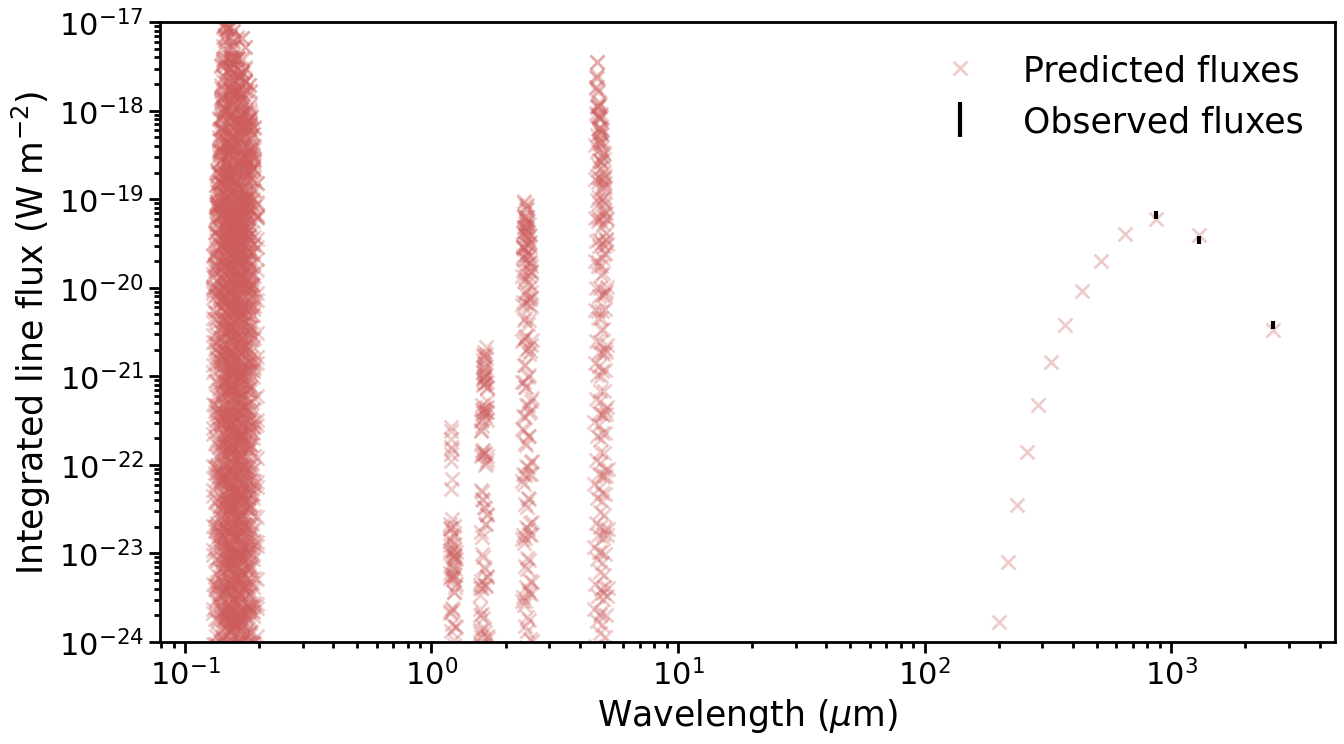

In [55]:
%matplotlib inline
pl.figure(figsize=(14,8))
pl.plot(2.9979e8*1e6/freqghz/1e9, fluxallfluo, 'x', color='indianred', mew=2, alpha=0.3, label='Predicted fluxes', ms=10)
pl.errorbar(2.9979e8*1e6/np.array([115.271,230.538,345.596])/1e9, np.array([3.83e-21, 3.5e-20, 6.7e-20]), yerr=0.1*np.array([3.836e-21, 3.5e-20, 6.7e-20]),fmt='None', label='Observed fluxes', ms=20, elinewidth=3, color='black')
pl.xscale('log')
pl.yscale('log')
pl.ylabel(r'Integrated line flux (W m$^{-2}$)')
pl.xlabel(r'Wavelength ($\mu$m)') 
pl.legend(frameon=False)
pl.ylim(1e-24,1e-17)
#pl.xlim(1e0,4e3)

Now plot instead fractional populations as a function of level energy

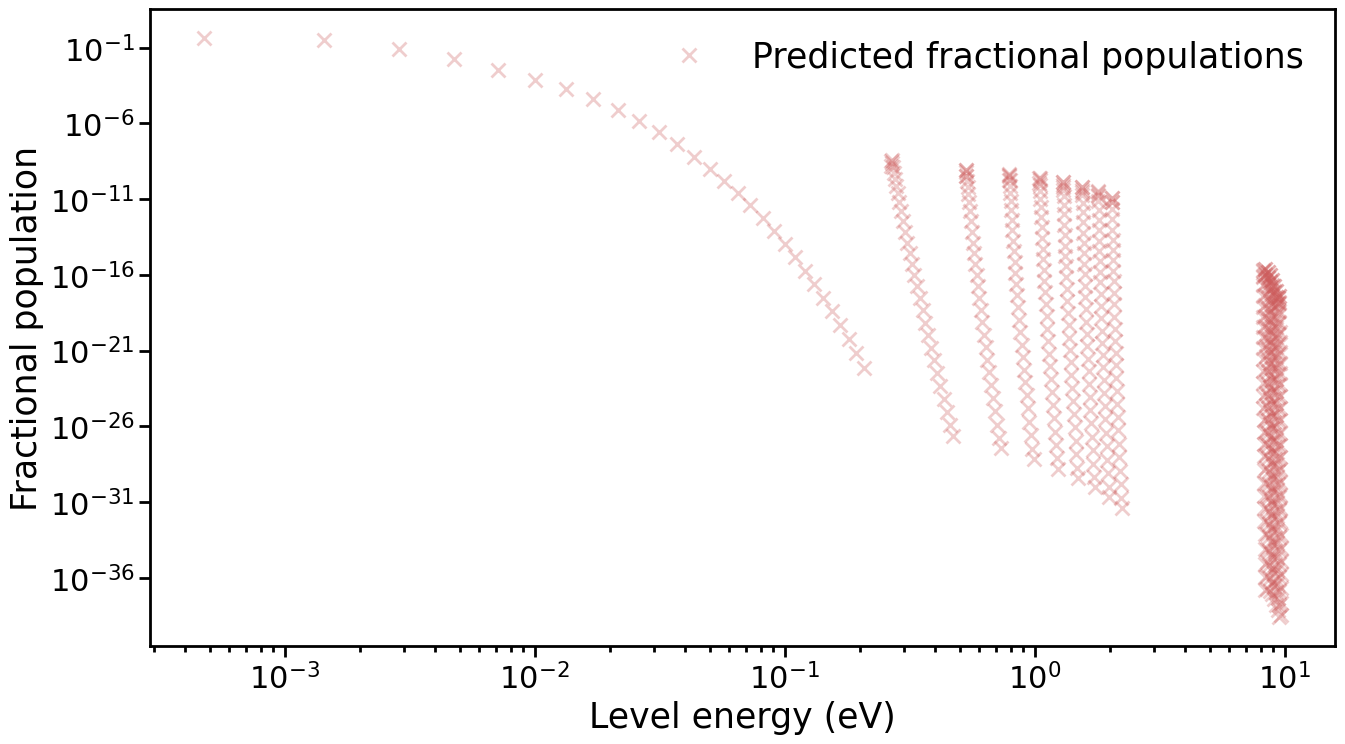

In [60]:
pl.figure(figsize=(14,8))
pl.plot(energycmmin1*1.23981e-4, fracpoplevelsfluo, 'x', color='indianred', mew=2, alpha=0.3, label='Predicted fractional populations', ms=10)
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'Level energy (eV)')
pl.ylabel(r'Fractional population') 
pl.legend(frameon=False)
#pl.xlim(-0.002,0.02)
#pl.ylim(1e-5,0)